# Voting

A técnica voting (votação) é uma técnica ensemble que tem como finalidade encontrar o melhor resultado de predição dentre N modelos apresentados. 

Para classificação o voting pode levar em conta qual classe foi a mais escolhida pelos modelos selecionados (voting = 'hard') ou levar em conta qual das classes tem mais probabilidade de ser a correta somando as probabilidades atingidas por cada modelo (voting='soft')

Já para regressão é utilizada a média dos valores preditos pelos modelos individuais

## Exemplos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression

from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.ensemble import VotingClassifier, VotingRegressor

### Classificação

In [2]:
#Gerando dados
X, y = make_classification(n_samples = 1000, n_features = 5, n_informative=3, n_classes=3)
X_train, X_test, y_train, y_test = X[:800],X[800:],y[:800],y[800:]

In [12]:
#Criando modelos
svc = SVC(kernel='poly')

dtc = DecisionTreeClassifier()

lr = LogisticRegression()

In [13]:
#Avaliando modelos separadamente para comparar com o stacking
svc.fit(X_train, y_train)
svc_sc = svc.score(X_test, y_test)

dtc.fit(X_train, y_train)
dtc_sc = dtc.score(X_test, y_test)

lr.fit(X_train, y_train)
lr_sc = lr.score(X_test, y_test)

print('SVC - Score: ', svc_sc)
print('Decision tree - Score: ', dtc_sc)
print('Logistic Regression - Score: ', lr_sc)

SVC - Score:  0.81
Decision tree - Score:  0.855
Logistic Regression - Score:  0.61


In [14]:
#Criando modelo de votação
estimators = [('svc', svc) , ('decision_tree', dtc) , ('lr', lr)]

voting_clf = VotingClassifier(estimators = estimators, voting='hard')

voting_clf.fit(X_train, y_train)

voting_sc = voting_clf.score(X_test, y_test)

print('Voting Classifier - Score: ', voting_sc)

Voting Classifier - Score:  0.865


### Regressão

In [15]:
#gerando dados
X, y = make_regression(n_samples = 1000, n_features = 5, shuffle = True)
X_train, X_test, y_train, y_test = X[:800],X[800:],y[:800],y[800:]

In [26]:
#Criando modelos
svr = SVR(kernel='poly')

dtr = DecisionTreeRegressor()

In [27]:
#Analisando modelos individualmente
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_sc = svr.score(X_test, y_test)

dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_sc = dtr.score(X_test, y_test)

print('SVR - Score: ', svr_sc)
print('Decision tree - Score: ', dtr_sc)

SVR - Score:  0.6755806687472372
Decision tree - Score:  0.9079097020082318


In [29]:
#Criando modelo de votação
estimators = [('svr', svr) , ('decision_tree', dtr)]

voting_reg = VotingRegressor(estimators = estimators)

voting_reg.fit(X_train, y_train)

voting_pred = voting_reg.predict(X_test)

voting_sc = voting_reg.score(X_test, y_test)

print('Voting Regressor - Score: ', voting_sc)

Voting Regressor - Score:  0.8810772011738592


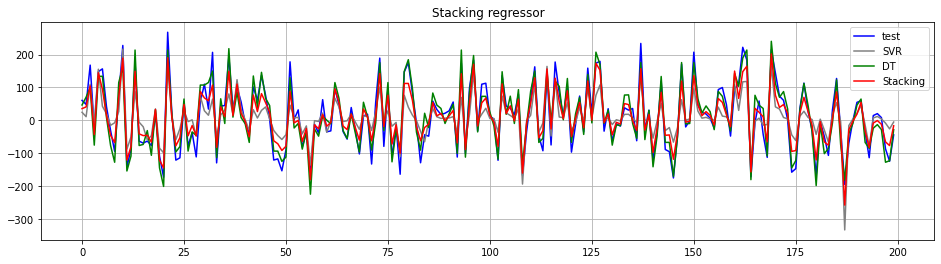

In [30]:
plt.figure(figsize=(16,4))
plt.title("Stacking regressor")
plt.plot(y_test, color='blue', label='test')
plt.plot(svr_pred, color='grey',label='SVR')
plt.plot(dtr_pred, color='green', label='DT')
plt.plot(voting_pred, color='red', label='Stacking')

plt.legend()
plt.grid()
plt.show()